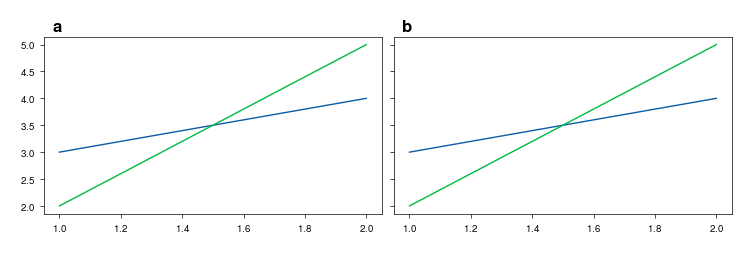

In [1]:
import cartopy.crs as ccrs
import EasyPlotLib as epl
import matplotlib.pyplot as plt
from cnmaps import get_adm_maps

nrows, ncols = 1, 2
figsizes = epl.figsizes("nat2", nrows=nrows, ncols=ncols)

plt.style.use(["nature"])
plt.rcParams.update(figsizes)
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True)

for n, ax in enumerate(axs.flatten()):
    ax.plot([1.0, 2.0], [3.0, 4.0])
    ax.plot([1.0, 2.0], [2.0, 5.0])
    ax.annotate(**epl.subplot_labels(n, "a", fontsize=12))

/Users/sam/miniforge3/envs/metro/lib/python3.12/site-packages/cnmaps/maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons


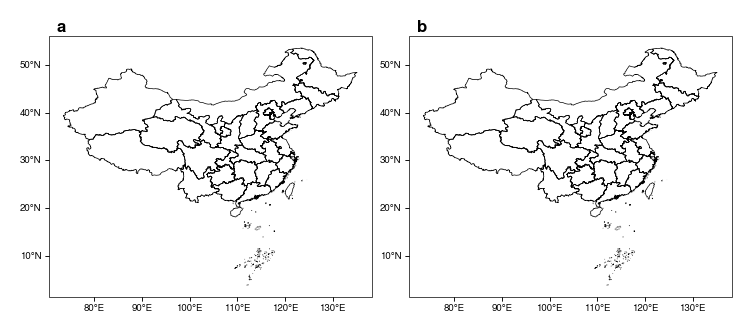

In [2]:
import cartopy.crs as ccrs
import EasyPlotLib as epl
import matplotlib.pyplot as plt
import numpy as np
from cnmaps import get_adm_maps

nrows, ncols = 1, 2
figsizes = epl.figsizes("nat2")

plt.style.use("nature")
plt.rcParams.update(figsizes)

china_map = get_adm_maps(level="省", engine="geopandas")
crs = ccrs.PlateCarree()


fig, axs = plt.subplots(
    ncols=ncols,
    nrows=nrows,
    subplot_kw={"projection": ccrs.PlateCarree()},
)
if nrows == 1 and ncols == 1:
    axs = np.array([[axs]])

for n, ax in enumerate(axs.flatten()):
    china_map.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.5)
    ax.annotate(**epl.subplot_labels(n, "a", fontsize=12))
    gl = ax.gridlines(
        draw_labels=True,
        color="none",
        linestyle="dotted",
        transform=crs,
    )
    gl.top_labels = gl.right_labels = False
    gl.rotate_labels = False

    epl.cartopy_plot_tickmarks(ax, gl)

/Users/sam/miniforge3/envs/metro/lib/python3.12/site-packages/cnmaps/maps.py:443: FutureWarning: You are adding a column named 'geometry' to a GeoDataFrame constructed without an active geometry column. Currently, this automatically sets the active geometry column to 'geometry' but in the future that will no longer happen. Instead, either provide geometry to the GeoDataFrame constructor (GeoDataFrame(... geometry=GeoSeries()) or use `set_geometry('geometry')` to explicitly set the active geometry column.
  gdf["geometry"] = map_polygons


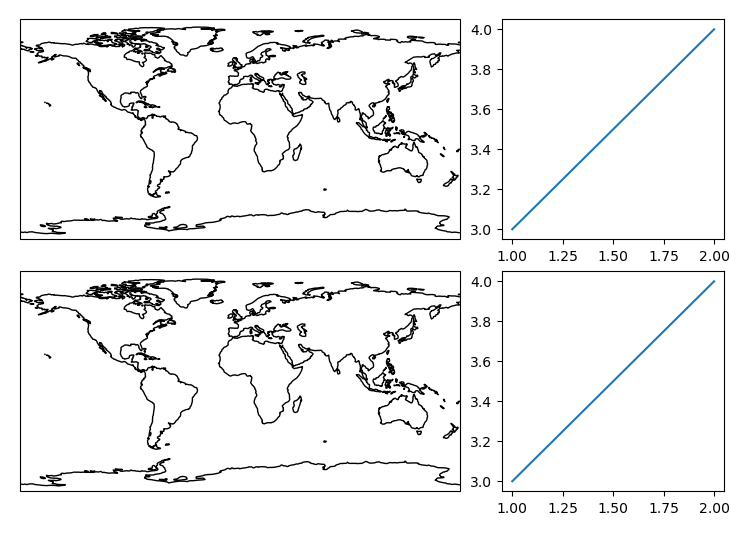

In [3]:
figsizes = epl.figsizes("nat2", nrows=2, ncols=2)

plt.style.use("default")
plt.rcParams.update(figsizes)

china_map = get_adm_maps(level="省", engine="geopandas")
crs = ccrs.PlateCarree()
fig, axs = plt.subplot_mosaic(
    """
    bba
    ccd
    """,
    per_subplot_kw={
        ("b", "c"): {"projection": crs},
    },
)
ax = axs["b"]
ax.set_global()
ax.coastlines()
ax = axs["c"]
ax.set_global()
ax.coastlines()

ax = axs["a"]
ax.plot([1.0, 2.0], [3.0, 4.0])

ax = axs["d"]
ax.plot([1.0, 2.0], [3.0, 4.0])

inverted_aspect_ratio = 0.7
figsizes = epl.figsizes("nat2", inverted_aspect_ratio=inverted_aspect_ratio)
fig.set_size_inches(figsizes["figure.figsize"])